In [1]:
import pandas as pd
import seaborn as sns 

from matplotlib import pyplot as plt 
%matplotlib inline
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})

from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm

import warnings 
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("data.csv")
old_data = pd.read_csv("SpotifyFeatures.csv")

In [3]:
new = df.merge(old_data, left_on = 'id', right_on='track_id')
new.sample(15)

,acousticness_x,artists,danceability_x,duration_ms_x,energy_x,explicit,id,instrumentalness_x,key_x,liveness_x,...,energy_y,instrumentalness_y,key_y,liveness_y,loudness_y,mode_y,speechiness_y,tempo_y,time_signature,valence_y
57324,0.085100,['Francesca Battistelli'],0.438,208707,0.732,0,5TXwU5dCw3h6Tsr0UC3APQ,0.000000,5,0.0948,...,0.732,0.000000,F,0.0948,-4.767,Major,0.0421,167.940,4/4,0.4960
3237,0.000130,['Disturbed'],0.575,258120,0.913,0,1lgQ7wpNDxSukuT4cgYrfW,0.000113,1,0.0477,...,0.913,0.000113,C#,0.0477,-4.028,Major,0.0476,98.005,4/4,0.4200
59776,0.160000,['Hooverphonic'],0.546,284293,0.613,0,4NyKEVldCvokxpmeFBNNXI,0.004030,10,0.1300,...,0.613,0.004030,A#,0.1300,-7.938,Minor,0.0480,68.172,4/4,0.4460
50615,0.255000,['H.E.R.'],0.415,200133,0.313,0,3tZs3nVjySLbL320lP4mvs,0.000014,1,0.1170,...,0.313,0.000014,C#,0.1170,-12.945,Minor,0.0561,84.953,4/4,0.0875
31120,0.671000,['Burl Ives'],0.670,130027,0.275,0,4hXAK3mjFVFOOiJQ3rKAXi,0.000000,0,0.1990,...,0.275,0.000000,C,0.2870,-12.767,Major,0.0475,153.251,4/4,0.7740
50914,0.071600,['Doja Cat'],0.710,217813,0.710,1,6iOvnACn4ChlAw4lWUU4dd,0.000001,0,0.2060,...,0.710,0.000001,C,0.2060,-2.474,Major,0.0579,169.944,4/4,0.7000
36930,0.324000,['Mike Jones'],0.650,221933,0.753,1,7xVwhsuZTUWhIyFeDH6rYr,0.000000,2,0.3070,...,0.753,0.000000,D,0.3070,-4.745,Minor,0.0632,82.478,4/4,0.6160
32112,0.305000,['Pink Floyd'],0.315,216800,0.218,0,66YHxyGAUGjMBDdrDlWIMD,0.001200,0,0.2260,...,0.218,0.001200,C,0.2260,-15.215,Major,0.0731,175.861,4/4,0.1560
57479,0.288000,['John Mayer'],0.559,275267,0.510,0,5DydMbw2U5Oh1OckJIsniN,0.000053,5,0.2420,...,0.510,0.000053,F,0.2420,-8.294,Minor,0.0247,129.881,4/4,0.3270
37620,0.643000,['Mac Miller'],0.558,178903,0.535,1,6ET22Ri3FYXi5C8BBqHWcO,0.000000,5,0.1010,...,0.535,0.000000,F,0.1010,-10.370,Major,0.1620,169.912,4/4,0.4630


In [4]:
new.shape

(70906, 37)

### <b>Data Description</b>
<font size=3>

acousticness: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic. 
    
artists: The name(s) of the artist(s) who perform the track.
    
danceability: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
    
duration_ms: A track's duration in milliseconds.
    
energy: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.
    
explicit: Whether the track was labeled as "explicit" due to content. 1 = Yes, 0 = No.
    
id: Track's unique identifier.
    
instrumentalness: Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.
    
key: The estimated overall key of the track. Integers map to pitches using standard Pitch Class notation . E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.
    
liveness: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.
    
loudness: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db. NOTE: Loudness is measured negatively here on purpose. This is because we are dealing with digital sound that a computer can listen to which is measured differently than what the human ear can listen to. This is sometimes why you will see negative numbers when you adjust the volume on your surround sound system. For more information on this, you can read this article: https://www.cablechick.com.au/blog/why-does-my-amplifier-use-negative-db-for-volume/
    
mode: Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.
    
name: Name of Track
    
popularity: The popularity of the track. The value will be between 0 and 100, with 100 being the most popular.The popularity of a track is a value between 0 and 100, with 100 being the most popular. The popularity is calculated by algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are.
    
release_date: Date of track's release.
    
speechiness: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.
    
tempo: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.
    
valence: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
    
year: Year of track's release.
    


In [5]:
df.dtypes

acousticness        float64
artists              object
danceability        float64
duration_ms           int64
energy              float64
explicit              int64
id                   object
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                  int64
name                 object
popularity            int64
release_date         object
speechiness         float64
tempo               float64
valence             float64
year                  int64
dtype: object

In [6]:
df.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.995,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.604,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.995,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928
4,0.990,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928


In [7]:
df.shape

(169909, 19)

In [8]:
df.sample(10)

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
128913,0.4610,"['Art Blakey Quintet', 'Clifford Brown']",0.429,419876,0.690,0,6EVWlOa8szdEioPJ5a0fh6,0.00838,5,0.8110,-8.533,0,"Quicksilver - Live At Birdland, New York/1954",10,1954-01-01,0.0665,140.125,0.8600,1954
73517,0.4690,"['Héctor Lavoe', 'Willie Colón', 'Yomo Toro']",0.531,218347,0.676,0,20PF48el1BhTuaWUhBQQ6V,0.00000,0,0.0603,-5.049,1,Qué Bien Te Ves,24,1975-01-01,0.0448,108.573,0.7480,1975
132594,0.2770,"['The New Life Community Choir', 'John P. Kee']",0.545,347160,0.668,0,0n3SoVx1FshSKMbjOGHg4L,0.00000,1,0.0472,-11.080,1,Standing In The Need (feat. John P. Kee),39,1991,0.0446,100.626,0.4900,1991
165961,0.1160,['Earl Thomas Conley'],0.698,207480,0.472,0,3GDL8ZvxvM33xNxwT0tIdw,0.00000,7,0.1290,-9.805,1,Smokey Mountain Memories,29,1981,0.0248,110.554,0.6540,1981
56474,0.9950,['Pinakin Shah'],0.602,203193,0.274,0,2oX1IZknLbHHAu2mkD7rT1,0.72300,5,0.3250,-9.817,1,Chalo Ne Ramiye Hodi,0,1952-10-01,0.1690,113.162,0.8090,1952
2122,0.7900,"['Ella Fitzgerald', 'The Paul Smith Quartet']",0.545,154160,0.465,0,7M4hyIZvWc5M9rqfBxKQn7,0.00000,5,0.9480,-13.753,0,Gone With The Wind - Live,20,1960-01-01,0.4350,150.420,0.7590,1960
98461,0.9800,['Francisco Canaro'],0.564,166507,0.404,0,2wwfE1tAtEx2TFlOHTHNJo,0.07880,4,0.9140,-5.135,1,Canción del Olvido - Instrumental (Remasterizado),0,1932-12-19,0.0406,116.824,0.8480,1932
126255,0.9830,['Francisco Canaro'],0.245,179507,0.338,0,4t0wNrIZukyFZa8HIIBH8o,0.86800,3,0.1120,-17.336,1,Florida - Instrumental (Remasterizado 2018),0,1926-08-15,0.0959,163.701,0.6350,1926
39948,0.0597,['Phil Wickham'],0.373,240267,0.703,0,5wrTjji1a7OkZfTo9TKesB,0.00000,4,0.0715,-5.803,1,Till I Found You,58,2018-08-03,0.0620,123.909,0.2210,2018
145571,0.9350,"['Ludwig van Beethoven', 'Announcer, May 6, 19...",0.699,23767,0.997,0,3TXSAn5vE0ORWPXXsAjAn9,0.01660,6,0.3490,-20.611,1,"Große Fuge in B-Flat Major, Op. 133 (Live): Ra...",0,1946,0.4620,117.576,0.0176,1946


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169909 entries, 0 to 169908
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      169909 non-null  float64
 1   artists           169909 non-null  object 
 2   danceability      169909 non-null  float64
 3   duration_ms       169909 non-null  int64  
 4   energy            169909 non-null  float64
 5   explicit          169909 non-null  int64  
 6   id                169909 non-null  object 
 7   instrumentalness  169909 non-null  float64
 8   key               169909 non-null  int64  
 9   liveness          169909 non-null  float64
 10  loudness          169909 non-null  float64
 11  mode              169909 non-null  int64  
 12  name              169909 non-null  object 
 13  popularity        169909 non-null  int64  
 14  release_date      169909 non-null  object 
 15  speechiness       169909 non-null  float64
 16  tempo             16

In [10]:
df.drop(['id'], axis=1, inplace=True)

In [11]:
print("Unique Keys -> ", len(df.key.unique()))
df.key.unique()

Unique Keys ->  12


array([10,  8,  5,  1, 11,  6,  9,  7,  4,  2,  3,  0])

In [12]:
print("Unique Artists -> ",len(df.artists.unique())) #artists are in list fix

Unique Artists ->  33375


In [13]:
df['popularity'] = df['popularity'].astype(float)
df['duration_ms'] = df['duration_ms'].astype(float)

In [14]:
continuous_columns = [col for col in df.columns if df[col].dtype == float or df[col].dtype == int]
categorical_columns = [col for col in df.columns if df[col].dtype == object]

In [15]:
print("Continuous Columns -> ",continuous_columns)
print("Categorical Columns -> ",categorical_columns)

Continuous Columns ->  ['acousticness', 'danceability', 'duration_ms', 'energy', 'explicit', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'popularity', 'speechiness', 'tempo', 'valence', 'year']
Categorical Columns ->  ['artists', 'name', 'release_date']


## Exploratory Data Analysis

- check for bias (across genres, key, mode)
- dist of popularity
- Correlation Matrix
- popularity relation with features (regression)

### Checking data balance

In [16]:
# df1 = df.groupby('genre', as_index=False).size().sort_values(by='size',ascending=True)
df2 = df.groupby('key', as_index=False).size().sort_values(by='size',ascending=True)
df3 = df.groupby('mode', as_index=False).size().sort_values(by='size',ascending=True)

In [17]:
# plt.xticks(rotation=90)
# sns.barplot(x='genre', y='size', data=df1).set_title("Number of songs per genre", fontsize=17)

In [18]:
# df1.head(3)

Text(0.5, 1.0, 'Number of songs per key')

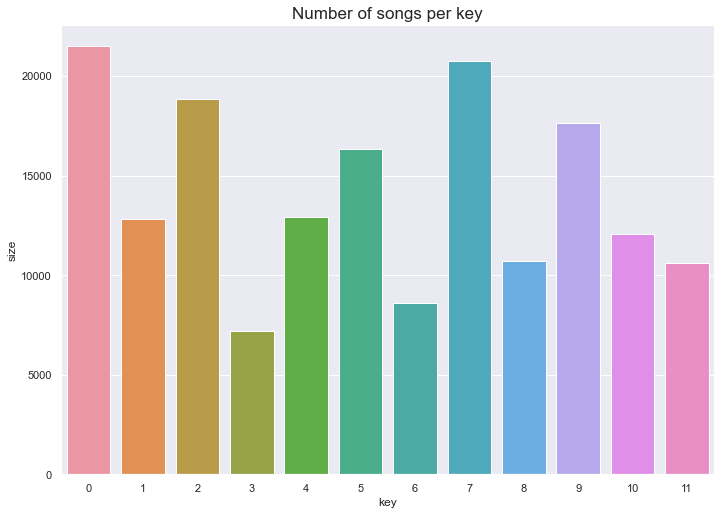

In [19]:
sns.barplot(x='key', y='size', data=df2).set_title("Number of songs per key", fontsize=17)

Text(0.5, 1.0, 'Number of songs per mode')

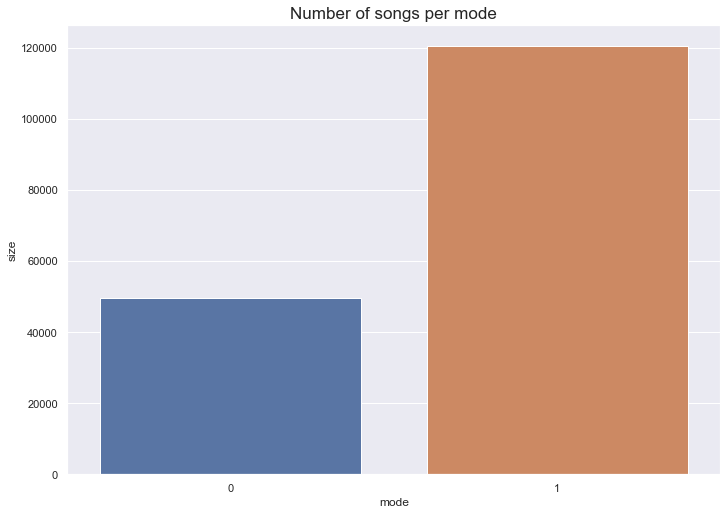

In [20]:
sns.barplot(x='mode', y='size', data=df3).set_title("Number of songs per mode", fontsize=17)

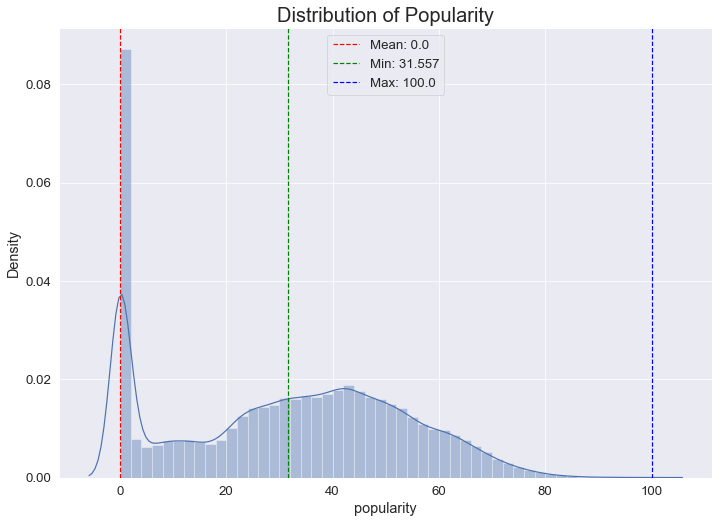

In [21]:
# Distribution of popularity score
sns.set_context("paper", font_scale=1.5)
sns.distplot(df.popularity).set_title("Distribution of Popularity", fontsize=20)
plt.axvline(df.popularity.min(), 0,1, label="Mean: " + str(df.popularity.min()), color = 'red', linestyle='dashed')
plt.axvline(df.popularity.mean(), 0,1, label="Min: " + str(round(df.popularity.mean(),3)), color = 'green', linestyle='dashed')
plt.axvline(df.popularity.max(), 0,1, label="Max: " + str(df.popularity.max()), color = 'blue', linestyle='dashed')
plt.legend()

In [22]:
# df_by_artist = df.groupby('artist_name', as_index=False).size().sort_values(by='size',ascending=True)
# df_by_artist.sample(15)

In [23]:
df_by_tempo = df.groupby('tempo', as_index=False).size().sort_values(by='size',ascending=True)
df_by_tempo.sample(5)

,tempo,size
59332,138.761,1
25505,97.970,3
750,59.554,1
57087,135.824,1
22046,93.935,2


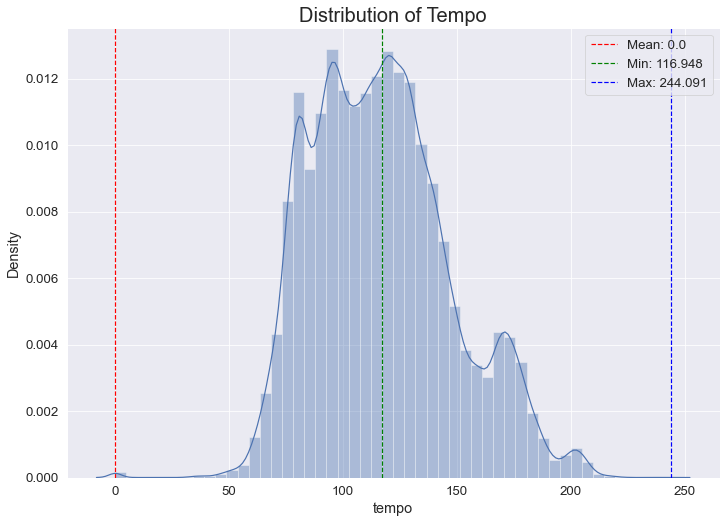

In [24]:
sns.distplot(df.tempo).set_title("Distribution of Tempo", fontsize=20)
plt.axvline(df.tempo.min(), 0,1, label="Mean: " + str(df.tempo.min()), color = 'red', linestyle='dashed')
plt.axvline(df.tempo.mean(), 0,1, label="Min: " + str(round(df.tempo.mean(),3)), color = 'green', linestyle='dashed')
plt.axvline(df.tempo.max(), 0,1, label="Max: " + str(df.tempo.max()), color = 'blue', linestyle='dashed')
plt.legend()

In [25]:
df_valence = df.groupby('valence', as_index=False).size().sort_values(by='size',ascending=True)
df_valence.sample(5)

,valence,size
513,0.06730,15
1467,0.72800,198
1354,0.61500,189
1705,0.96600,356
20,0.00449,1


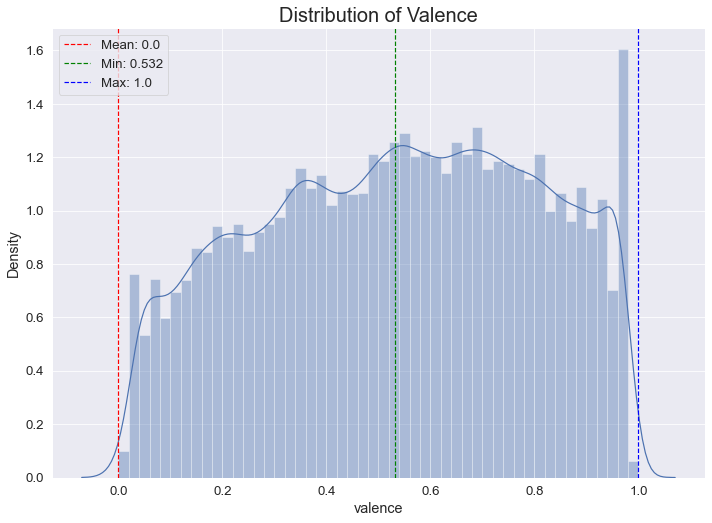

In [26]:
sns.distplot(df.valence).set_title("Distribution of Valence", fontsize=20)
plt.axvline(df.valence.min(), 0,1, label="Mean: " + str(df.valence.min()), color = 'red', linestyle='dashed')
plt.axvline(df.valence.mean(), 0,1, label="Min: " + str(round(df.valence.mean(),3)), color = 'green', linestyle='dashed')
plt.axvline(df.valence.max(), 0,1, label="Max: " + str(df.valence.max()), color = 'blue', linestyle='dashed')
plt.legend()

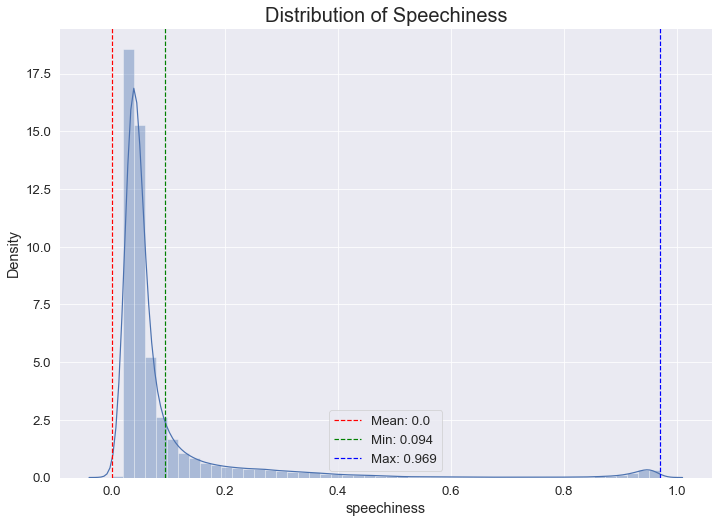

In [27]:
sns.distplot(df.speechiness).set_title("Distribution of Speechiness", fontsize=20)
plt.axvline(df.speechiness.min(), 0,1, label="Mean: " + str(df.speechiness.min()), color = 'red', linestyle='dashed')
plt.axvline(df.speechiness.mean(), 0,1, label="Min: " + str(round(df.speechiness.mean(),3)), color = 'green', linestyle='dashed')
plt.axvline(df.speechiness.max(), 0,1, label="Max: " + str(df.speechiness.max()), color = 'blue', linestyle='dashed')
plt.legend()

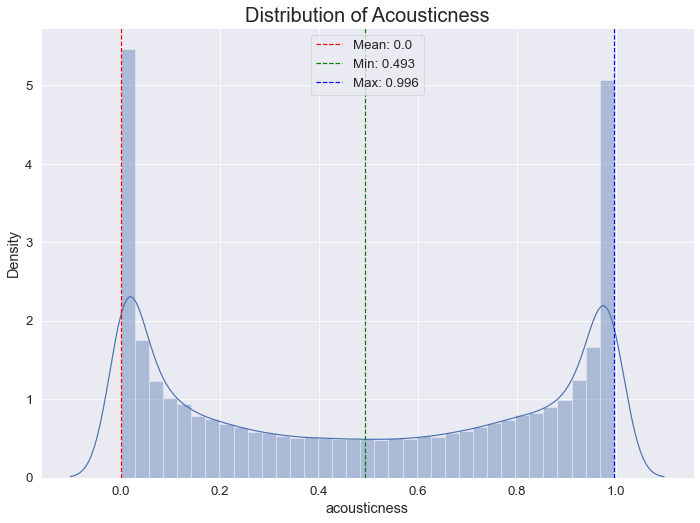

In [28]:
sns.distplot(df.acousticness).set_title("Distribution of Acousticness", fontsize=20)
plt.axvline(df.acousticness.min(), 0,1, label="Mean: " + str(df.acousticness.min()), color = 'red', linestyle='dashed')
plt.axvline(df.acousticness.mean(), 0,1, label="Min: " + str(round(df.acousticness.mean(),3)), color = 'green', linestyle='dashed')
plt.axvline(df.acousticness.max(), 0,1, label="Max: " + str(df.acousticness.max()), color = 'blue', linestyle='dashed')
plt.legend()

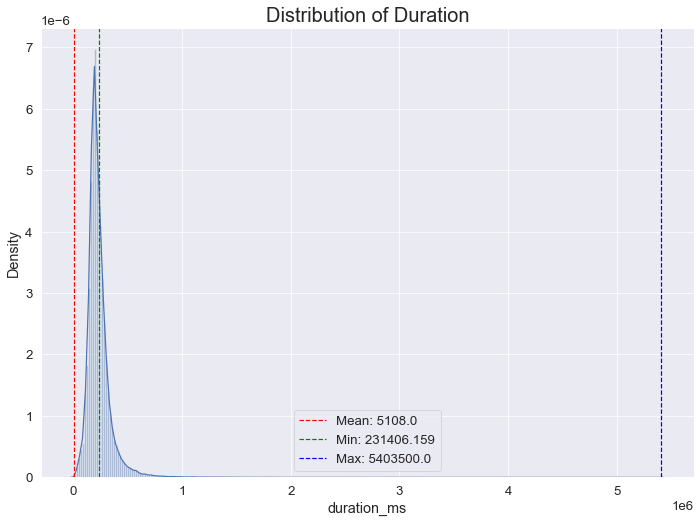

In [29]:
sns.distplot(df.duration_ms,bins=300).set_title("Distribution of Duration", fontsize=20)
plt.axvline(df.duration_ms.min(), 0,1, label="Mean: " + str(df.duration_ms.min()), color = 'red', linestyle='dashed')
plt.axvline(df.duration_ms.mean(), 0,1, label="Min: " + str(round(df.duration_ms.mean(),3)), color = 'green', linestyle='dashed')
plt.axvline(df.duration_ms.max(), 0,1, label="Max: " + str(df.duration_ms.max()), color = 'blue', linestyle='dashed')
plt.legend()

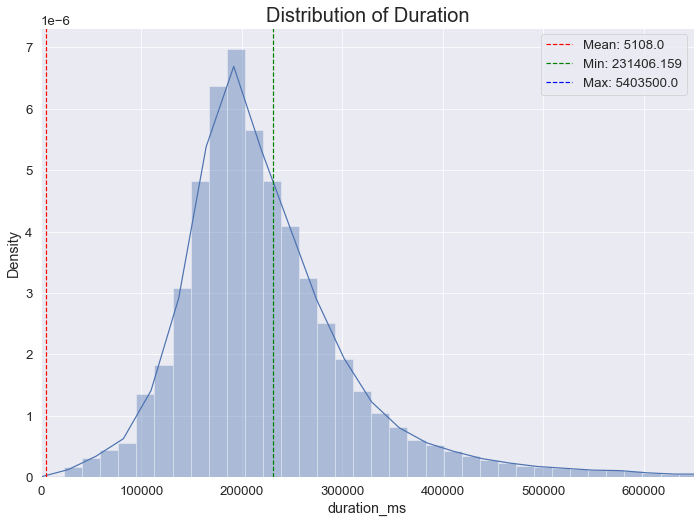

In [30]:
g = sns.distplot(df.duration_ms,bins=300)
g.set_xlim(0,650000)
g.set_title("Distribution of Duration", fontsize=20)
plt.axvline(df.duration_ms.min(), 0,1, label="Mean: " + str(df.duration_ms.min()), color = 'red', linestyle='dashed')
plt.axvline(df.duration_ms.mean(), 0,1, label="Min: " + str(round(df.duration_ms.mean(),3)), color = 'green', linestyle='dashed')
plt.axvline(df.duration_ms.max(), 0,1, label="Max: " + str(df.duration_ms.max()), color = 'blue', linestyle='dashed')
plt.legend()

Text(0.5, 1.0, 'Distribution of Release dates')

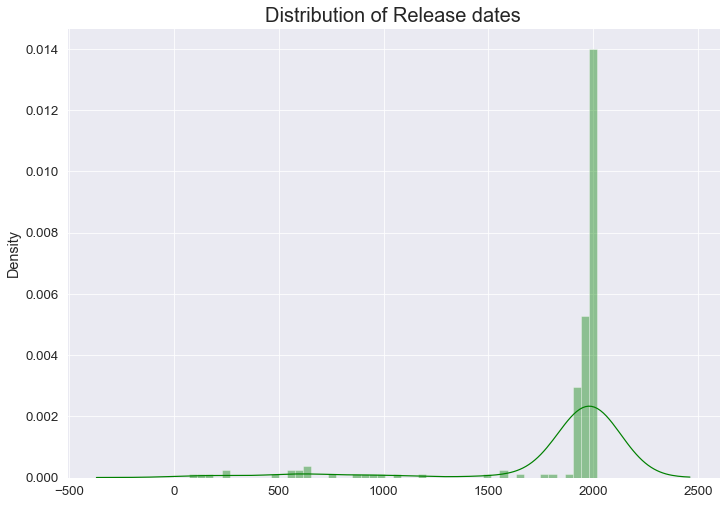

In [61]:
df_release = df.groupby('year', as_index=False).size().sort_values(by='size',ascending=True)
sns.distplot(df_release,  color = 'green').set_title("Distribution of Release dates", fontsize=20)


In [63]:
# ax = sns.lineplot(x=df.groupby('year', as_index=False).size(), y='popularity', data = df, ci=False, hue='Promo')



## Regression

In [42]:
X1 = df[['acousticness', 'danceability', 
            'duration_ms', 'energy', 'instrumentalness', 
            'liveness', 'loudness', 'speechiness', 'tempo', 'valence']]

Y1 = df[['popularity']]
X1 = sm.add_constant(X1)
model1 = sm.OLS(Y1, X1).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:             popularity   R-squared:                       0.459
Model:                            OLS   Adj. R-squared:                  0.459
Method:                 Least Squares   F-statistic:                 1.440e+04
Date:                Thu, 25 Nov 2021   Prob (F-statistic):               0.00
Time:                        18:25:34   Log-Likelihood:            -7.1087e+05
No. Observations:              169909   AIC:                         1.422e+06
Df Residuals:                  169898   BIC:                         1.422e+06
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               40.9024      0.398  

In [43]:
lr_stats = sm.OLS(Y1, X1).fit()

# print the coefficients
lr_stats.params
lr_stats.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             popularity   R-squared:                       0.459
Model:                            OLS   Adj. R-squared:                  0.459
Method:                 Least Squares   F-statistic:                 1.440e+04
Date:                Thu, 25 Nov 2021   Prob (F-statistic):               0.00
Time:                        18:25:35   Log-Likelihood:            -7.1087e+05
No. Observations:              169909   AIC:                         1.422e+06
Df Residuals:                  169898   BIC:                         1.422e+06
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               40.9024      0.398    102.851      0.000      40.123      41.682
acousticness       -23.2082      0.168   -138.233      0.000     -23.537     -22.879
danceability        27.0802      0.298     90.813      0.000      26.496      27.665
duration_ms       5.166e-07   3.29e-07      1.571      0.116   -1.28e-07    1.16e-06
energy              11.1166      0.318     35.013      0.000      10.494      11.739
instrumentalness    -7.0411      0.144    -48.797      0.000      -7.324      -6.758
liveness            -7.6301      0.228    -33.425      0.000      -8.078      -7.183
loudness             0.3234      0.012     26.790      0.000       0.300       0.347
speechiness        -25.7627      0.278    -92.590      0.000     -26.308     -25.217
tempo                0.0256      0.001     19.357      0.000       0.023       0.028
valence            -22.9175      0.197   -116.497      0.000     -23.303     -22.532
==============================================================================
Omnibus:                     7118.213   Durbin-Watson:                   0.911
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8048.157
Skew:                           0.521   Prob(JB):                         0.00
Kurtosis:                       3.224   Cond. No.                     3.50e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.5e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [44]:
X2 = df[['acousticness', 'danceability']]#, 
            # 'energy', 'instrumentalness', 
            # 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']]
Y2 = df[['popularity']]
X2 = sm.add_constant(X2)
model2 = sm.OLS(Y2, X2).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:             popularity   R-squared:                       0.356
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                 4.704e+04
Date:                Thu, 25 Nov 2021   Prob (F-statistic):               0.00
Time:                        18:25:35   Log-Likelihood:            -7.2560e+05
No. Observations:              169909   AIC:                         1.451e+06
Df Residuals:                  169906   BIC:                         1.451e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           43.3045      0.164    263.708   

In [45]:
X3 = df[['energy', 'instrumentalness']]
Y3 = df[['popularity']]
X3 = sm.add_constant(X3)
model3 = sm.OLS(Y3, X3).fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:             popularity   R-squared:                       0.274
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                 3.211e+04
Date:                Thu, 25 Nov 2021   Prob (F-statistic):               0.00
Time:                        18:25:35   Log-Likelihood:            -7.3580e+05
No. Observations:              169909   AIC:                         1.472e+06
Df Residuals:                  169906   BIC:                         1.472e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               15.8058      0.105  

### Heat Maps

In [46]:
ht_df = df[['popularity','acousticness', 'danceability', 
            'duration_ms','energy', 'instrumentalness', 
            'liveness', 'loudness', 'speechiness', 'tempo', 'valence']]

<AxesSubplot:>

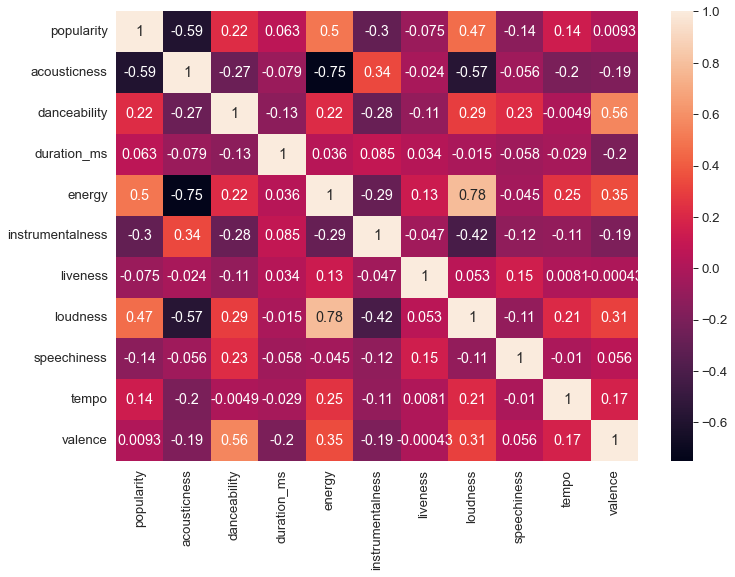

In [47]:
sns.heatmap(ht_df.corr(), annot=True)

### Label Encoder

In [48]:
lbc = LabelEncoder()

In [49]:
for col in categorical_columns:
    df[col] = lbc.fit_transform(df[col])
    print(lbc.classes_)

[    0     1     2 ... 33372 33373 33374]
[     0      1      2 ... 132937 132938 132939]
[    0     1     2 ... 10879 10880 10881]


In [50]:
df.sample(5)

,acousticness,artists,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
96562,0.40200,31063,0.855,321987.0,0.746,1,0.00000,3,0.1460,-3.777,0,125103,60.0,7931,0.2320,95.026,0.375,2008
143007,0.00636,1805,0.460,302800.0,0.975,0,0.00000,2,0.2590,-4.673,1,93187,47.0,7738,0.0821,154.080,0.662,2007
71547,0.98900,13877,0.362,205053.0,0.253,0,0.91700,4,0.3560,-19.223,1,113148,0.0,818,0.1760,180.605,0.750,1955
25384,0.99400,26484,0.650,205905.0,0.200,0,0.16700,0,0.3060,-9.948,1,126192,0.0,637,0.0941,108.491,0.584,1952
124562,0.00104,11958,0.813,257213.0,0.547,0,0.00335,2,0.0914,-5.936,1,122775,54.0,7352,0.0344,119.998,0.800,2004


In [51]:
X3 = df.drop(columns=['popularity'])
Y3 = df[['popularity']]
X3 = sm.add_constant(X3)
model3 = sm.OLS(Y3, X3).fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:             popularity   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                 3.629e+04
Date:                Thu, 25 Nov 2021   Prob (F-statistic):               0.00
Time:                        18:25:38   Log-Likelihood:            -6.3281e+05
No. Observations:              169909   AIC:                         1.266e+06
Df Residuals:                  169891   BIC:                         1.266e+06
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1275.0128      7.971  

In [52]:
# X4 = df.drop(columns=['popularity', 'track_name'])
# Y4 = df[['popularity']]
# X4 = sm.add_constant(X4)
# model4 = sm.OLS(Y4, X4).fit()
# print(model4.summary())

In [53]:
# X4 = df.drop(columns=['popularity', 'track_name', 'duration_ms', 'tempo'])
# Y4 = df[['popularity']]
# X4 = sm.add_constant(X4)
# model4 = sm.OLS(Y4, X4).fit()
# print(model4.summary())

In [54]:
# sls = df.drop(columns=['name', 'duration_ms', 'tempo'])

In [55]:
# sns.heatmap(sls.corr(), annot=True)